##**TASK** **2**   **Prediction** **Using** **Supervised**  **ML**
#**Submitted** **By** - **Daman** **Preet** **Singh**

##**Linear** **Regression** **with** **Python** Scikit **Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

##**Simple** **Linear** **Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [100]:
#NOW WE WILL IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Now** **we** **will** **load** **the** **dataset**

In [101]:
score_data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [102]:
#This is how the data look
score_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [103]:
# Information regarding student scores
score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [104]:
score_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [105]:
score_data.shape

(25, 2)

**Let's plot our data points on 2-D graph and see if we can manually find any relationship between the data. We can create the plot with the following script:**

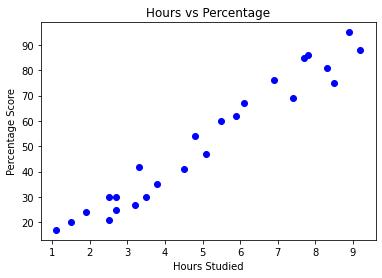

In [106]:
#Using matplotlib we will visualisze the data
plt.plot(score_data['Hours'],score_data['Scores'],'bo')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [107]:
#From the graph we can see that there is a positive linear correlation between the Hours studied and Percentage

#Let's try seaborn library to visualize the data 

In [108]:
#Import seaborn library
import seaborn as sns

In [109]:
#let's see the correlation
score_data.corr()


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


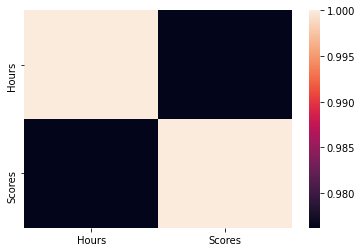

In [110]:
sns.heatmap(score_data.corr())

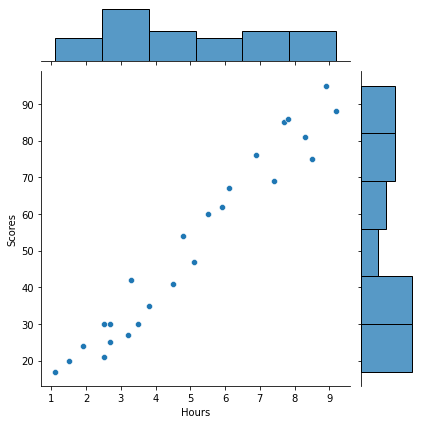

In [111]:
sns.jointplot(x = 'Hours' , y ='Scores' , data = score_data)

In [112]:
#From the graph we can see that there is a positive linear correlation between the Hours studied and Percentage

In [113]:
# Next we can divide the dataset for prediction
# we can divide it in to attribute variable and target variable
# Attribute variable be Hours column and Target variable is the Scores

In [114]:
# Here we can use iloc to assign the values of the variable in to X and y


#Preparing the dataset

In [115]:
X= score_data.iloc[: ,:-1].values
y = score_data.iloc[:,1].values

In [116]:
# Here (-1) specifies that it will store all the columns except the last column 
# and likewise (1) specifies the second column since th column index starts with 0


In [117]:
# Next step is to split the training and testing dataset.
# We can do this by using the train_test_split() method included in the Scikit-Learn's library

In [118]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [119]:
#The above code split 80% to the training dataset and 20% to the test dataset.
# test_size variable specifies the 80-20 proportion of the dataset

In [120]:
# we have completed our dataset splitting. Now we have to train our algorithm.
# We can execute the following code

#**Training** **the** **algorithm**

In [121]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
# With Scikit-Learn you can import the Linear Regression model
# Then import the LinearRegress class, instantiate it and then call fit() method

In [123]:
# Linear Regression basically finds the best value of the intercept and slope.

In [124]:
# To see the value of the intercept and slope we can use the following code

In [125]:
print(regressor.intercept_)

2.018160041434662


In [126]:
print(regressor.coef_)

[9.91065648]


In [127]:
# If a student studies one hour more than previous studieh hours, 
# then the student can see the increase of the percentage scrore by 9.91.

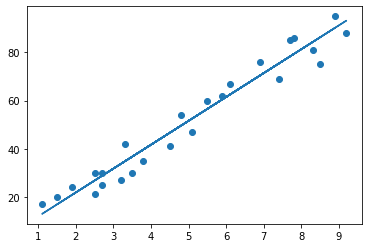

In [128]:
# Plotting the scatterplot to visualize the intercept and slope
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()


In [129]:
# Now its time to make predictions

#**Making predictions**

In [130]:
# Now we can use ourtest data to check how actually our trained algorithm predicted the score

In [131]:
# Execute the following code for prediction

In [132]:
y_pred = regressor.predict(X_test)

In [133]:
# y_pred predicts the value for the X_test series

In [134]:
# To compare the actual output values for X_test with the predicted values, execute the following code

In [135]:
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
score

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [136]:
# Our mode will predict the values close to the actual values

In [137]:
# Lets evaluate the algorithm

**Evaluating the algorithm**

In [138]:
# Here we can evaluate the performance of the algorithm

In [139]:
#For regression algorithms three common metrics will be used.
## Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE)

In [140]:
# The Scikit-Learn library comes with pre-built functions that helps to find the values for these metrics

In [141]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


In [142]:
#You can see that the value of root mean squared error is 4.64, 
# which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. 
# This means that our algorithm did good work on predictions.

In [143]:
# We can test with some new data 
# lets find the predicted score if a student studies for 9.25 hrs/ day?
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [144]:
# If the student studies for 9.25 hours per day our model predicts the score is 93.6 percentage